## Завдання.
Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів.  
Після цього використайте для оцінки похибки Mean Squared Error, в якості оптимізатора - Adam. Порівняйте, чи змінилась похибка та точність.


In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [28]:
nX, nH1, nH2, nY = 2, 5, 5, 1

In [29]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)             # у повнозв'язкових шарах
        self.fc3 = nn.Linear(nH2, nY)
        
          
             
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація  
        return x      

In [30]:
X = torch.rand (1000, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

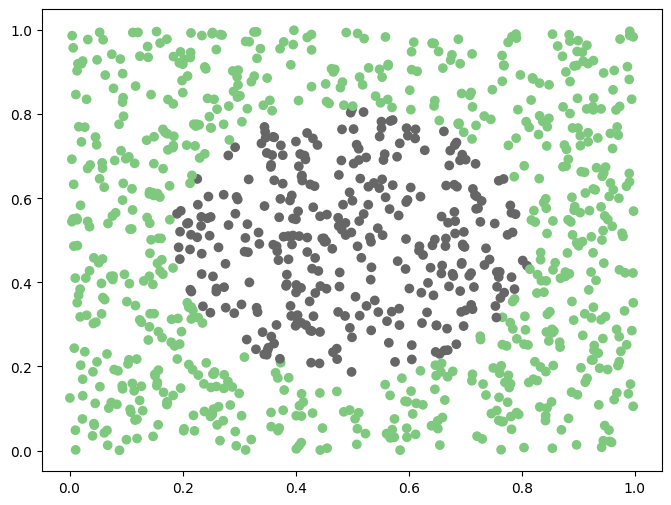

In [31]:
plt.figure (figsize=(8, 6))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0], cmap=plt.cm.Accent)        
plt.show()

In [32]:
def fit(model, X,Y, batch_size=100, train=True):    
    model.train(train)                                 
    sumL, sumA, numB = 0, 0, int(len(X)/batch_size) 

    for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу

        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка

        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри

        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу

    return sumL/numB,  sumA/numB   

### Модель 1

In [33]:
model_1 = ThreeLayersNet(2, 5, 5, 1)                    # створення екземпляру класу
loss      = nn.BCELoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.5, momentum=0.8)

In [34]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_1, X,Y) )
 
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_1, X, Y)                             # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.6474 accuracy: 0.6490
epoch:     0 loss: 0.6313 accuracy: 0.6830
epoch:   100 loss: 0.6257 accuracy: 0.6830
epoch:   200 loss: 0.6251 accuracy: 0.6830
epoch:   300 loss: 0.5929 accuracy: 0.6830
epoch:   400 loss: 0.1110 accuracy: 0.9640
epoch:   500 loss: 0.0694 accuracy: 0.9770
epoch:   600 loss: 0.0836 accuracy: 0.9650
epoch:   700 loss: 0.0723 accuracy: 0.9650
epoch:   800 loss: 0.0682 accuracy: 0.9670
epoch:   900 loss: 0.0667 accuracy: 0.9680
epoch:   999 loss: 0.0630 accuracy: 0.9720


In [35]:
dict(model_1.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ -0.2816,  16.7219],
         [-14.2261,  -8.2432],
         [ 10.7139,   6.6401],
         [  1.1395,   0.7033],
         [ 14.1802,  -7.9078]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ -5.3170,  14.5978, -10.2167,   3.8148,  -0.7627], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ -7.6520,  -4.9812,   5.1659,   6.2489,  -7.2649],
         [-10.6544,  -6.9585,   5.0839,   8.6647, -10.6503],
         [ -1.4830,  -0.2569,   0.3200,  -0.3389,  -1.3766],
         [ -1.9446,   1.6540,   0.0339,  -1.1487,  -5.8718],
         [-12.0543,   5.0777,   1.1784,   1.8772, -12.4484]],
        requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([6.5004, 8.4299, 0.3247, 0.2827, 5.2475], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[ -9.9367, -13.8899,  -1.4901,  -4.4955, -12.5330]],
        requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([11.0086], requires_g

### Модель 2

In [ ]:
model_2 = ThreeLayersNet(2, 5, 5, 1)                    # створення екземпляру класу
loss      = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr = 0.01)

In [37]:
                                                        # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_2, X,Y) )
 
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_2, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.2188 accuracy: 0.6830
epoch:     0 loss: 0.2166 accuracy: 0.6830
epoch:   100 loss: 0.0327 accuracy: 0.9650
epoch:   200 loss: 0.0157 accuracy: 0.9850
epoch:   300 loss: 0.0114 accuracy: 0.9920
epoch:   400 loss: 0.0090 accuracy: 0.9940
epoch:   500 loss: 0.0075 accuracy: 0.9940
epoch:   600 loss: 0.0064 accuracy: 0.9950
epoch:   700 loss: 0.0057 accuracy: 0.9960
epoch:   800 loss: 0.0051 accuracy: 0.9970
epoch:   900 loss: 0.0047 accuracy: 0.9970
epoch:   999 loss: 0.0043 accuracy: 0.9980


In [38]:
dict(model_2.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ 0.6315, -7.9635],
         [ 1.3962, -5.4511],
         [-7.8748,  1.3489],
         [-5.5756, -5.2304],
         [ 4.4405,  1.3907]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 1.7932,  4.1381,  1.2003,  6.4671, -4.7029], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ 8.0718, -3.3493,  7.9822, -4.8228,  4.8482],
         [-9.1197,  3.4496, -9.4348,  5.4632, -6.0870],
         [ 8.2859, -3.6986,  8.0794, -4.8987,  4.8974],
         [ 7.9353, -2.9800,  8.1339, -4.9111,  4.9568],
         [-9.2729,  3.5048, -9.5731,  5.6043, -6.0917]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([ 1.1848, -0.9002,  1.4497,  0.9100, -0.9742], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-9.5190, 11.4870, -9.5431, -9.6683, 12.3375]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([0.3175], requires_grad=True)}

### Висновок:  
Друга модель, де в якості оптимізатора використовується метод ADAM, а в якості функції втрат - похибка MSE, показує трохи кращі результати ніж перша модель, де оптимізатор - SGD(стохастичний градієнтий спуск), а функція втрат - BCE(двійкова перехресна ентропія).
    